In [3]:
import pandas as pd
from time import time
import numpy as np
import os, glob

In [39]:
#compile individual df
start =time()
src = r'\\fatherserverdw\q\research\images\skin_aging\wsi\hovernet_out\dfv2'
df = pd.concat([pd.read_pickle(_) for _ in glob.glob(os.path.join(src,'*.pkl')) if ('156' not in _) and ('167' not in _)], ignore_index=True)
print(time()-start)

EOFError: Ran out of input

In [43]:
df = df.astype({'type': 'int8',
           'inroi': 'int8',
           'resident_area': 'int32',
           'Area': 'float32',
           'Perimeter': 'float32',
           'Circularity': 'float32',
           'MA': 'float32',
           'ma': 'float32',
           'orientation': 'float32',
           'AspectRatio': 'float32',
           'Sol': 'float32',
           'Extent': 'float32',
           'EquiDia': 'float32',
           'imID': 'int16',
           'dist2nearest': 'float32',
           'oriA': 'float32',
           'oriB': 'float32',
           'local_align': 'float32'})

In [48]:
df.head()

,bbox,centroid,contour,type,inroi,resident_area,Area,Perimeter,Circularity,MA,...,nucleus2spinosum,nucleus2shaft,nucleus2follicle,nucleus2muscle,nucleus2oil,nucleus2sweat,nucleus2nerve,nucleus2blood,nucleus2ecm,nucleus2fat
0,"[[2704, 42876], [2713, 42885]]","[3968.290909090909, 41619.527272727275]","[[3966, 41616], [3965, 41617], [3965, 41618], ...",10,2,286900,43.5,25.556349,0.836954,8.674428,...,2502.0,2802.0,2770.0,1701.0,2250.0,1520.0,1775.0,1668.0,0.0,405.00000
1,"[[2512, 44562], [2520, 44575]]","[3607.698795180723, 43476.01204819277]","[[3605, 43472], [3604, 43473], [3603, 43473], ...",10,2,286900,67.0,33.313709,0.758645,12.677104,...,3312.0,3570.0,3626.0,2538.0,3100.0,2082.0,2564.0,2044.0,4.0,5.65625
2,"[[4331, 44227], [4340, 44235]]","[5318.245283018868, 43246.64150943396]","[[5318, 43243], [5317, 43244], [5316, 43244], ...",10,2,286900,41.0,25.313707,0.804048,8.834397,...,2924.0,2848.0,3390.0,2252.0,2848.0,1463.0,1914.0,1353.0,0.0,188.37500
3,"[[4589, 44719], [4601, 44731]]","[5812.0084745762715, 43506.338983050846]","[[5807, 43501], [5807, 43509], [5808, 43510], ...",10,2,286900,99.0,39.313709,0.804928,13.713907,...,2984.0,2598.0,3500.0,2360.0,2956.0,1430.0,1717.0,1100.0,0.0,203.62500
4,"[[4596, 43456], [4604, 43466]]","[4548.5, 43511.55172413793]","[[4547, 43508], [4546, 43509], [4544, 43509], ...",10,2,286900,45.0,27.313709,0.757986,9.958237,...,3148.0,3150.0,3550.0,2424.0,3012.0,1785.0,2252.0,1629.0,0.0,28.00000


In [46]:
df[['nucleus2corneum','nucleus2spinosum','nucleus2shaft','nucleus2follicle','nucleus2muscle','nucleus2oil','nucleus2sweat','nucleus2nerve','nucleus2blood','nucleus2ecm','nucleus2fat']] = pd.DataFrame(df.c2t_distance.tolist(), index= df.index, dtype=np.float32)
df.drop(["c2t_distance"],inplace=True, axis=1)

In [53]:
df = df.reset_index(drop=True)

In [54]:
df.to_feather(os.path.join(src, '2d_skin_hovernet_nuclei.ftr'))

In [4]:
start =time()
src = r'\\fatherserverdw\q\research\images\skin_aging\wsi\hovernet_out\dfv2'
df = pd.read_feather(os.path.join(src, '2d_skin_hovernet_nuclei.ftr')) #2.6GB
print(round(time()-start))

57


In [9]:
agelut = pd.read_excel(r'\\fatherserverdw\Q\research\source code\skin_aging_matlab\skin_samples.xlsx', sheet_name='imlist')

In [5]:
df.head()

,bbox,centroid,contour,type,inroi,resident_area,Area,Perimeter,Circularity,MA,...,nucleus2spinosum,nucleus2shaft,nucleus2follicle,nucleus2muscle,nucleus2oil,nucleus2sweat,nucleus2nerve,nucleus2blood,nucleus2ecm,nucleus2fat
0,"[[2704, 42876], [2713, 42885]]","[3968.290909090909, 41619.527272727275]","[[3966, 41616], [3965, 41617], [3965, 41618], ...",10,2,286900,43.5,25.556349,0.836954,8.674428,...,2502.0,2802.0,2770.0,1701.0,2250.0,1520.0,1775.0,1668.0,0.0,405.00000
1,"[[2512, 44562], [2520, 44575]]","[3607.698795180723, 43476.01204819277]","[[3605, 43472], [3604, 43473], [3603, 43473], ...",10,2,286900,67.0,33.313709,0.758645,12.677104,...,3312.0,3570.0,3626.0,2538.0,3100.0,2082.0,2564.0,2044.0,4.0,5.65625
2,"[[4331, 44227], [4340, 44235]]","[5318.245283018868, 43246.64150943396]","[[5318, 43243], [5317, 43244], [5316, 43244], ...",10,2,286900,41.0,25.313707,0.804048,8.834397,...,2924.0,2848.0,3390.0,2252.0,2848.0,1463.0,1914.0,1353.0,0.0,188.37500
3,"[[4589, 44719], [4601, 44731]]","[5812.0084745762715, 43506.338983050846]","[[5807, 43501], [5807, 43509], [5808, 43510], ...",10,2,286900,99.0,39.313709,0.804928,13.713907,...,2984.0,2598.0,3500.0,2360.0,2956.0,1430.0,1717.0,1100.0,0.0,203.62500
4,"[[4596, 43456], [4604, 43466]]","[4548.5, 43511.55172413793]","[[4547, 43508], [4546, 43509], [4544, 43509], ...",10,2,286900,45.0,27.313709,0.757986,9.958237,...,3148.0,3150.0,3550.0,2424.0,3012.0,1785.0,2252.0,1629.0,0.0,28.00000


In [7]:
df.type.unique()

array([10, 11,  9,  8,  6,  4,  5,  7,  2,  3], dtype=int8)

In [5]:
histcounts = df.type.value_counts(bins=[1,2,3,4,5,6,7,8,9,10,11,12]).sort_index()
histcounts

(0.999, 2.0]    2697902
(2.0, 3.0]        18142
(3.0, 4.0]       186958
(4.0, 5.0]       234765
(5.0, 6.0]       204154
(6.0, 7.0]       734048
(7.0, 8.0]       229900
(8.0, 9.0]      1050275
(9.0, 10.0]     2443222
(10.0, 11.0]      42794
(11.0, 12.0]          0
Name: type, dtype: int64

In [6]:
celltype_ratios = histcounts.divide(histcounts.sum()*0.01)
celltype_ratios

(0.999, 2.0]    34.402537
(2.0, 3.0]       0.231339
(3.0, 4.0]       2.384012
(4.0, 5.0]       2.993627
(5.0, 6.0]       2.603288
(6.0, 7.0]       9.360278
(7.0, 8.0]       2.931590
(8.0, 9.0]      13.392675
(9.0, 10.0]     31.154962
(10.0, 11.0]     0.545691
(11.0, 12.0]     0.000000
Name: type, dtype: float64

In [1]:
import matplotlib as mpl
mpl.rcParams['savefig.format'] = 'svg'
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.cm import get_cmap
import pywintypes
import addcopyfighandler
mpl.use('Qt5Agg')
plt.plot([1,2,3],[1,2,3])
plt.show()

In [7]:
celltype_ratios.plot.bar().set_xticks(range(10),['Epidermis','Hair_shaft','Hair_follicle','Muscle','Oil','Sweat','Nerve','Blood','ECM','Fat'],rotation=45)
plt.show()

In [11]:
plt.show()

In [67]:
len(df.loc[(df.type==10) & (df.AspectRatio>3) & (df.Circularity<0.5) & (df.Area>50) & (df.dist2nearest>30)])

71234

In [10]:
# %%time
avgs = []
stds = []
cvs = []
#patient
for imid in df['imID'].unique():
    pkl = df[df['imID']==imid]
    pkl = pkl.drop(columns=['bbox', 'centroid','contour'])
    #section
    for secid in pkl['inroi'].unique():
        pk = pkl[pkl['inroi']==secid]
        #tissue type
        for type in range(2,11): #2-13 #12 is fibroblast #13 is inflammatory
            p = pk[pk['type']==type]
            pkmean = p.mean(axis=0)
            pkmean['Ncell'] = len(p)
            # In case there is no value, prevent wiping imid, type, inroi, age
            pkmean['imID'] = imid
            pkmean['type'] = type
            pkmean['inroi'] = secid
            pkmean['Age'] = agelut['Age'][agelut['redcap']==imid].values[0]
            pkstd = p.std(axis=0)
            pkstd['Ncell'] = 0
            pkstd['imID'] = imid
            pkstd['type'] = type
            pkstd['inroi'] = secid
            pkstd['Age'] = agelut['Age'][agelut['redcap']==imid].values[0]
            pkcv = pkstd/pkmean
            pkcv['imID'] = imid
            pkcv['type'] = type
            pkcv['inroi'] = secid
            pkcv['Age'] = agelut['Age'][agelut['redcap']==8].values[0]
            stds.append(pkstd.replace(np.nan,0))
            avgs.append(pkmean.replace(np.nan, 0))
            cvs.append(pkcv.replace(np.nan, 0))

In [11]:
avgdf = pd.DataFrame(avgs)
stddf = pd.DataFrame(stds)
cvdf = pd.DataFrame(cvs)

In [12]:
avgdf.to_csv('avgdf.csv')
stddf.to_csv('stddf.csv')
cvdf.to_csv('cvdf.csv')

In [19]:
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
from skimage.morphology import remove_small_objects
import numpy as np
import cv2
from skimage.measure import label
from matplotlib import pyplot as plt
dlsrc = r'\\fatherserverdw\Q\research\images\skin_aging\1um\classification_v9_combined'
roisrc = r'\\fatherserverdw\Q\research\images\skin_aging\annotation\roi\tif'
dl = Image.open(os.path.join(dlsrc, '41.tif'))
roi = Image.open(os.path.join(roisrc, '41_tissue_binary.tif'))
dl.size ,roi.size

((35356, 23609), (8839, 5903))

In [36]:
roiarr = np.array(roi)
roiimL = label(roiarr)
numsec = np.max(roiimL)

#we are gonna resize dl to roi size for faster calculations
dl = dl.resize(roi.size)
dlarr = np.array(dl)

minszs = [8000,100000,1000,1000,1000,1000,1000,1000,1000,10000,1000] # 11 elements
minszs = [round(_ / 16) for _ in minszs] #downscale by 16 from 0.454um/px to 2um/px
roidx = 3
dlarrm = np.multiply(dlarr, roiimL == roidx)

minsz = minszs[roidx-1]
dltmp = dlarrm==roidx
dltmp2 = remove_small_objects(dltmp,minsz)

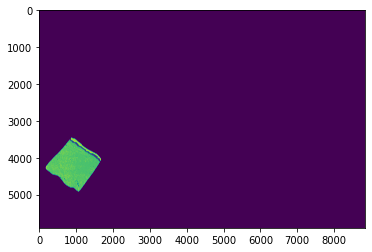

In [37]:
plt.imshow(dlarrm)

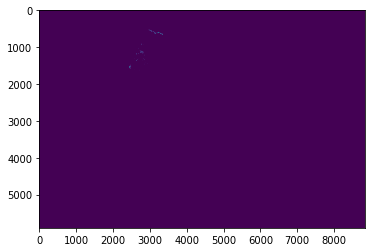

In [25]:
plt.imshow(dltmp)

In [33]:
800*16

12800

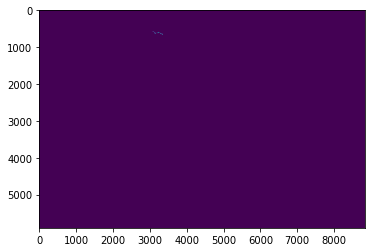

In [35]:
plt.imshow(remove_small_objects(dltmp,500))